# Joseph Chew

## Research question/interests

I am interested in understanding how does the price and accommodation size relationship affect the review score.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import project_functions3 as p3
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
#import missingno as ms

In [2]:

df = pd.read_csv ("../data/raw/listings.csv")


In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [4]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.56
2,23691,https://www.airbnb.com/rooms/23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.79
3,27423,https://www.airbnb.com/rooms/27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.21
4,28160,https://www.airbnb.com/rooms/28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,https://a0.muscache.com/pictures/166666/71e95e...,86838,https://www.airbnb.com/users/show/86838,...,5.00,5.00,4.86,NaN,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,https://www.airbnb.com/rooms/51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,https://a0.muscache.com/pictures/e7a25a9c-f8df...,311805447,https://www.airbnb.com/users/show/311805447,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,https://www.airbnb.com/rooms/51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/e90918d6-9268...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,https://www.airbnb.com/rooms/51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,259499767,https://www.airbnb.com/users/show/259499767,...,NaN,NaN,NaN,STR-2009-UDFHGC,f,5,3,2,0,NaN
15082,51493385,https://www.airbnb.com/rooms/51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/f921100f-37dd...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,STR-2011-GDQKVF,f,4,4,0,0,NaN


In [5]:
#Milestone 3
#Task 1 - EDA

In [6]:
df = pd.read_csv("../data/raw/listings.csv")
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15084 entries, 0 to 15083
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15084 non-null  int64  
 1   listing_url                                   15084 non-null  object 
 2   scrape_id                                     15084 non-null  int64  
 3   last_scraped                                  15084 non-null  object 
 4   name                                          15083 non-null  object 
 5   description                                   14598 non-null  object 
 6   neighborhood_overview                         9326 non-null   object 
 7   picture_url                                   15084 non-null  object 
 8   host_id                                       15084 non-null  int64  
 9   host_url                                      15084 non-null 

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [7]:
df.describe(include='float64')

,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,15077.000000,15077.000000,0.0,15084.000000,15084.000000,0.0,13945.000000,14873.000000,15084.000000,1.508400e+04,0.0,11609.000000,11435.000000,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000,11609.000000
mean,5.689593,5.689593,NaN,43.681463,-79.397382,NaN,1.444532,1.645263,27.492761,4.942609e+05,NaN,4.650082,4.780028,4.679526,4.835753,4.837102,4.825204,4.694973,1.340099
std,18.884768,18.884768,NaN,0.048682,0.065256,NaN,0.824944,1.107654,39.570448,3.135789e+07,NaN,0.725082,0.430746,0.510812,0.383327,0.406078,0.336104,0.460011,3.584430
min,0.000000,0.000000,NaN,43.586740,-79.622620,NaN,1.000000,0.000000,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,NaN,43.645490,-79.425860,NaN,1.000000,1.000000,28.000000,3.650000e+02,NaN,4.630000,4.750000,4.590000,4.830000,4.840000,4.780000,4.630000,0.160000
50%,1.000000,1.000000,NaN,43.663165,-79.397250,NaN,1.000000,1.000000,28.000000,1.125000e+03,NaN,4.840000,4.910000,4.840000,4.960000,4.970000,4.930000,4.810000,0.510000
75%,4.000000,4.000000,NaN,43.702235,-79.376487,NaN,2.000000,2.000000,28.000000,1.125000e+03,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.430000
max,272.000000,272.000000,NaN,43.833170,-79.119670,NaN,9.000000,13.000000,1125.000000,2.147484e+09,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,144.000000


In [8]:
df.describe(include='object').T

,count,unique,top,freq
listing_url,15084,15084,https://www.airbnb.com/rooms/1419,1
last_scraped,15084,2,2021-08-06,9702
name,15083,14742,Private room in a shared hostel suite downtown,8
description,14598,14018,Whether you are just getting away for the week...,12
neighborhood_overview,9326,7850,The lively Entertainment District lives up to ...,60
picture_url,15084,14646,https://a0.muscache.com/pictures/5b42a820-a046...,12
host_url,15084,9864,https://www.airbnb.com/users/show/10202618,71
host_name,15077,4740,David,105
host_since,15077,3272,2013-11-23,73
host_location,15070,336,"Toronto, Ontario, Canada",11048


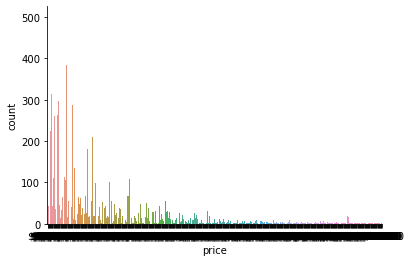

In [9]:
sns.countplot(x="price", data = df)
sns.despine()

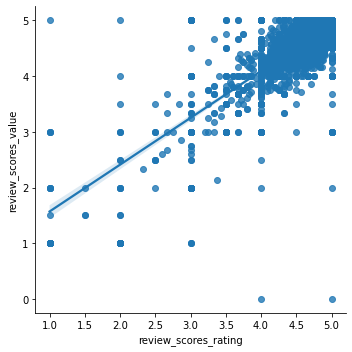

In [10]:
sns.lmplot(x='review_scores_rating', y='review_scores_value', data=df)
sns.despine()

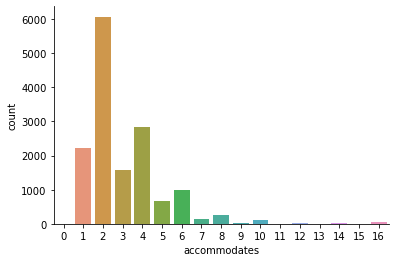

In [11]:
sns.countplot(x='accommodates',data=df)
sns.despine()

In [12]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,15084.000000,15084.000000,15084.000000,15077.000000,15077.000000,0.000000,15084.000000,15084.000000,15084.000000,0.000000,...,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000,15084.000000,15084.000000,15084.000000,15084.000000,11609.000000
mean,29116306.871519,20210806113117.812500,119809289.570339,5.689593,5.689593,nan,43.681463,-79.397382,3.061787,nan,...,4.679526,4.835753,4.837102,4.825204,4.694973,4.329886,2.817224,1.354150,0.116945,1.340099
std,14650732.034674,0.812527,115703984.873553,18.884768,18.884768,nan,0.048682,0.065256,2.015330,nan,...,0.510812,0.383327,0.406078,0.336104,0.460011,8.432275,7.806021,3.192597,1.698709,3.584430
min,1419.000000,20210806113117.000000,1565.000000,0.000000,0.000000,nan,43.586740,-79.622620,0.000000,nan,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,17331240.250000,20210806113117.000000,22371065.000000,1.000000,1.000000,nan,43.645490,-79.425860,2.000000,nan,...,4.590000,4.830000,4.840000,4.780000,4.630000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,30231058.500000,20210806113117.000000,76478633.500000,1.000000,1.000000,nan,43.663165,-79.397250,2.000000,nan,...,4.840000,4.960000,4.970000,4.930000,4.810000,1.000000,1.000000,0.000000,0.000000,0.510000
75%,42132381.000000,20210806113117.000000,201584938.000000,4.000000,4.000000,nan,43.702235,-79.376487,4.000000,nan,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,2.000000,1.000000,0.000000,1.430000
max,51493427.000000,20210806113117.000000,416677873.000000,272.000000,272.000000,nan,43.833170,-79.119670,16.000000,nan,...,5.000000,5.000000,5.000000,5.000000,5.000000,71.000000,71.000000,29.000000,34.000000,144.000000


In [13]:
df_temp = df[["id", 'name', 'host_id', 'host_name','price','accommodates', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
df_temp

,id,name,host_id,host_name,price,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1419,Beautiful home in amazing area!,1565,Alexandra,$469.00,10,5.00,5.00,5.00,5.00,5.00,5.00,5.00
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,$94.00,2,4.84,4.81,4.89,4.87,4.90,4.92,4.83
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,$72.00,3,4.75,4.73,4.82,4.90,4.93,4.34,4.73
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,$45.00,1,4.92,5.00,4.82,5.00,5.00,4.82,4.82
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,$75.00,1,4.86,4.86,4.86,4.86,5.00,5.00,4.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,Spacious Studio Apartment Downtown Toronto Sma...,311805447,Anthony,$71.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15080,51493223,Elegant One Bedroom Condo in Core Downtown,416677873,Debashis,$109.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15081,51493266,Bright large 2 bedrooms apt with separate entr...,259499767,Sue,$106.00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15082,51493385,2 BR Condo Downtown with CN Tower View,416677873,Debashis,$263.00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_temp.describe(include='object').T

,count,unique,top,freq
name,15083,14742,Private room in a shared hostel suite downtown,8
host_name,15077,4740,David,105
price,15084,620,$100.00,501


In [15]:
df_temp.describe(include='float64')

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,11609.000000,11435.000000,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000
mean,4.650082,4.780028,4.679526,4.835753,4.837102,4.825204,4.694973
std,0.725082,0.430746,0.510812,0.383327,0.406078,0.336104,0.460011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.630000,4.750000,4.590000,4.830000,4.840000,4.780000,4.630000
50%,4.840000,4.910000,4.840000,4.960000,4.970000,4.930000,4.810000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,15084.000000,15084.000000,15084.000000,15077.000000,15077.000000,0.000000,15084.000000,15084.000000,15084.000000,0.000000,...,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000,15084.000000,15084.000000,15084.000000,15084.000000,11609.000000
mean,29116306.871519,20210806113117.812500,119809289.570339,5.689593,5.689593,nan,43.681463,-79.397382,3.061787,nan,...,4.679526,4.835753,4.837102,4.825204,4.694973,4.329886,2.817224,1.354150,0.116945,1.340099
std,14650732.034674,0.812527,115703984.873553,18.884768,18.884768,nan,0.048682,0.065256,2.015330,nan,...,0.510812,0.383327,0.406078,0.336104,0.460011,8.432275,7.806021,3.192597,1.698709,3.584430
min,1419.000000,20210806113117.000000,1565.000000,0.000000,0.000000,nan,43.586740,-79.622620,0.000000,nan,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,17331240.250000,20210806113117.000000,22371065.000000,1.000000,1.000000,nan,43.645490,-79.425860,2.000000,nan,...,4.590000,4.830000,4.840000,4.780000,4.630000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,30231058.500000,20210806113117.000000,76478633.500000,1.000000,1.000000,nan,43.663165,-79.397250,2.000000,nan,...,4.840000,4.960000,4.970000,4.930000,4.810000,1.000000,1.000000,0.000000,0.000000,0.510000
75%,42132381.000000,20210806113117.000000,201584938.000000,4.000000,4.000000,nan,43.702235,-79.376487,4.000000,nan,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,2.000000,1.000000,0.000000,1.430000
max,51493427.000000,20210806113117.000000,416677873.000000,272.000000,272.000000,nan,43.833170,-79.119670,16.000000,nan,...,5.000000,5.000000,5.000000,5.000000,5.000000,71.000000,71.000000,29.000000,34.000000,144.000000


In [17]:
#Task 2 - Analysis pipeline 

In [18]:
df['price'] = df['price'].apply(lambda x : p3.replace_characters(x, ['$', ','], '')).astype(float)

In [19]:
#Removing columns that aren't necessary or won't be used
df1 = df.copy().drop(['listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'], axis=1)

In [20]:
df1.columns

Index(['id', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',


In [21]:
#Using function to find threshold of missing values and printing out the column names that meet this threshold.
l = p3.rmissingvaluecol(df1, 50)
df1 = df[l]

Number of columns having more than 50 percent missing values:  4
Columns:
 ['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license']


/Users/josephchew/data301/project-group11-project/notebooks/project_functions3.py:65: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  l = list(df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index)) >= threshold))].columns, 1).columns.values)


In [22]:
df1

,id,scrape_id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada",...,5.00,5.00,5.00,5.00,f,1,1,0,0,0.09
1,8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",...,4.87,4.90,4.92,4.83,t,2,1,1,0,1.56
2,23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,93825,Yohan & Sarah,2010-03-15,"Toronto, Ontario, Canada",...,4.90,4.93,4.34,4.73,t,2,0,2,0,1.79
3,27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,118124,Brent,2010-05-04,"Toronto, Ontario, Canada",...,5.00,5.00,4.82,4.82,f,1,1,0,0,0.21
4,28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,86838,Rita,2010-03-01,"Toronto, Ontario, Canada",...,4.86,5.00,5.00,4.86,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,311805447,Anthony,2019-11-24,"Toronto, Ontario, Canada",...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,416677873,Debashis,2021-08-03,CA,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,259499767,Sue,2019-05-02,"Toronto, Ontario, Canada",...,NaN,NaN,NaN,NaN,f,5,3,2,0,NaN
15082,51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,416677873,Debashis,2021-08-03,CA,...,NaN,NaN,NaN,NaN,f,4,4,0,0,NaN


In [23]:
df1 = df1.sort_values("accommodates",ascending=False, ignore_index=True)

In [24]:
df1.nunique(axis=0)
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,15084.000000,15084.000000,15084.000000,15077.000000,15077.000000,15084.000000,15084.000000,15084.000000,13945.000000,14873.000000,...,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000,15084.000000,15084.000000,15084.000000,15084.000000,11609.000000
mean,29116306.871519,20210806113117.812500,119809289.570339,5.689593,5.689593,43.681463,-79.397382,3.061787,1.444532,1.645263,...,4.679526,4.835753,4.837102,4.825204,4.694973,4.329886,2.817224,1.354150,0.116945,1.340099
std,14650732.034674,0.812527,115703984.873554,18.884768,18.884768,0.048682,0.065256,2.015330,0.824944,1.107654,...,0.510812,0.383327,0.406078,0.336104,0.460011,8.432275,7.806021,3.192597,1.698709,3.584430
min,1419.000000,20210806113117.000000,1565.000000,0.000000,0.000000,43.586740,-79.622620,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,17331240.250000,20210806113117.000000,22371065.000000,1.000000,1.000000,43.645490,-79.425860,2.000000,1.000000,1.000000,...,4.590000,4.830000,4.840000,4.780000,4.630000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,30231058.500000,20210806113117.000000,76478633.500000,1.000000,1.000000,43.663165,-79.397250,2.000000,1.000000,1.000000,...,4.840000,4.960000,4.970000,4.930000,4.810000,1.000000,1.000000,0.000000,0.000000,0.510000
75%,42132381.000000,20210806113117.000000,201584938.000000,4.000000,4.000000,43.702235,-79.376487,4.000000,2.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,2.000000,1.000000,0.000000,1.430000
max,51493427.000000,20210806113117.000000,416677873.000000,272.000000,272.000000,43.833170,-79.119670,16.000000,9.000000,13.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,71.000000,71.000000,29.000000,34.000000,144.000000


In [25]:
df1.columns

Index(['id', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',

In [26]:
df1[['price','accommodates','review_scores_rating']]

,price,accommodates,review_scores_rating
0,640.0,16,NaN
1,1043.0,16,4.87
2,500.0,16,NaN
3,555.0,16,NaN
4,971.0,16,4.84
...,...,...,...
15079,26.0,1,4.50
15080,45.0,1,NaN
15081,0.0,0,NaN
15082,0.0,0,NaN


In [27]:
df_clean = df1[['price','review_scores_rating']]
df_clean =  df_clean[df_clean['review_scores_rating'].notna()]
df_clean

,price,review_scores_rating
1,1043.0,4.87
4,971.0,4.84
6,1500.0,5.00
7,736.0,5.00
8,614.0,5.00
...,...,...
15073,30.0,5.00
15074,28.0,4.63
15075,38.0,5.00
15076,39.0,4.50


In [28]:
#Task 3 - Method chaining

In [29]:
data = "../data/raw/listings.csv"
df = p3.unprocessed(data)
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.56
2,23691,https://www.airbnb.com/rooms/23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.79
3,27423,https://www.airbnb.com/rooms/27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.21
4,28160,https://www.airbnb.com/rooms/28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,https://a0.muscache.com/pictures/166666/71e95e...,86838,https://www.airbnb.com/users/show/86838,...,5.00,5.00,4.86,NaN,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,https://www.airbnb.com/rooms/51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,https://a0.muscache.com/pictures/e7a25a9c-f8df...,311805447,https://www.airbnb.com/users/show/311805447,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,https://www.airbnb.com/rooms/51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/e90918d6-9268...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,https://www.airbnb.com/rooms/51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,259499767,https://www.airbnb.com/users/show/259499767,...,NaN,NaN,NaN,STR-2009-UDFHGC,f,5,3,2,0,NaN
15082,51493385,https://www.airbnb.com/rooms/51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/f921100f-37dd...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,STR-2011-GDQKVF,f,4,4,0,0,NaN


In [30]:
lf = p3.loadfinal(data)
lf

,id,name,host_name,price,accommodates,review_scores_rating,review_scores_value
0,51000956,"🌅Stunning Central Condo, with free parking",Jess,640.0,16,NaN,NaN
1,31831051,The One - Urban City - Stay or Vacation - Bout...,Shalini,1043.0,16,4.87,4.79
2,43655687,2 story 3 bedroom+den townhouse/5 bed/1700sf,Shane,500.0,16,NaN,NaN
3,51128339,Canada's Wonderland Free tickets Wed- Sat morn...,Shoren,555.0,16,NaN,NaN
4,32786051,Luxurious Condo DT Amazing Lake Views sleeps 10+4,Shane,971.0,16,4.84,4.70
...,...,...,...,...,...,...,...
15079,39942736,37 millgate small room,Farshid,26.0,1,4.50,5.00
15080,9328245,1 room in a 2 storey apt.,Carl,45.0,1,NaN,NaN
15081,42738772,Residence & Conference Centre - Toronto,Rcc,0.0,0,NaN,NaN
15082,48483693,Sandman Signature Toronto Airport Hotel,Ghyath,0.0,0,NaN,NaN


In [31]:
cf = p3.cleanfinal(lf)
cf

/Users/josephchew/data301/project-group11-project/notebooks/project_functions3.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['price'] = clean['price'].apply(lambda x : replace_characters(x, ['$', ','], '')).astype(float)


,price,accommodates,review_scores_rating
1,1043.0,16,4.87
4,971.0,16,4.84
6,1500.0,16,5.00
7,736.0,16,5.00
8,614.0,16,5.00
...,...,...,...
15073,30.0,1,5.00
15074,28.0,1,4.63
15075,38.0,1,5.00
15076,39.0,1,4.50


<AxesSubplot:>

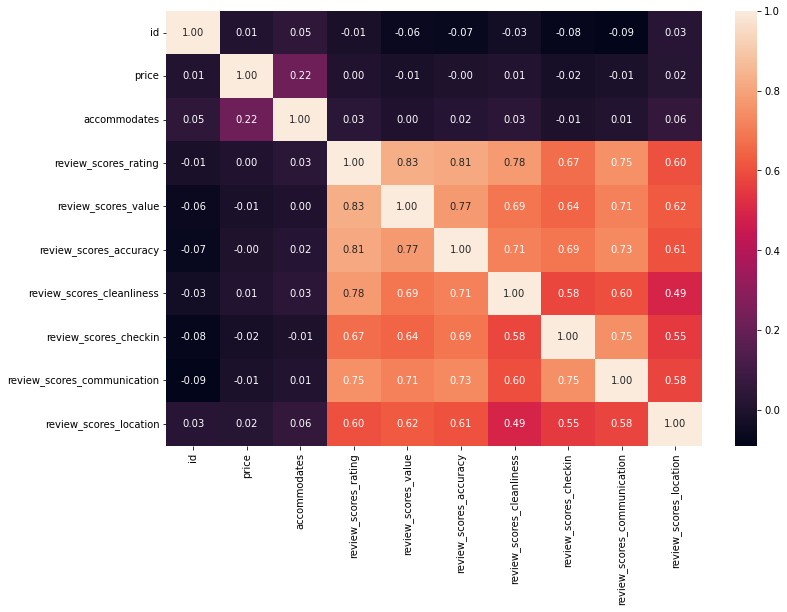

In [32]:
all = p3.loadall(data)
plt.figure(figsize=(12,8))
m = all.corr()
sns.heatmap(m, annot=True, fmt=".2f")

In [33]:
pppa = p3.price_per_person_all(all)
pppa

,id,name,host_name,price,accommodates,review_scores_rating,review_scores_value,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,price_per_person
1,31831051,The One - Urban City - Stay or Vacation - Bout...,Shalini,1043.0,16,4.87,4.79,4.76,4.86,4.79,4.93,4.99,65.1875
4,32786051,Luxurious Condo DT Amazing Lake Views sleeps 10+4,Shane,971.0,16,4.84,4.70,4.84,4.88,4.53,4.77,4.95,60.6875
6,43925819,Creative Studio,Jathusan,1500.0,16,5.00,4.50,4.83,4.83,4.83,5.00,4.67,93.7500
7,50745053,"🎲 Steps from CNTOWER, Pool Table, Free Parking",Anita,736.0,16,5.00,5.00,5.00,5.00,5.00,5.00,5.00,46.0000
8,44020713,Events- Gatherings-Patio-BBQ-DT-Entertainment ...,Shalini,614.0,16,5.00,5.00,5.00,5.00,4.80,5.00,5.00,38.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15073,39915735,"Room DOWNTOWN Subway w/balcony, sound travels ...",Ria,30.0,1,5.00,4.00,5.00,3.00,5.00,5.00,5.00,30.0000
15074,39919967,Bright & clean room close to Yonge & Finch subway,Fanak,28.0,1,4.63,4.63,4.88,4.79,4.88,4.96,4.46,28.0000
15075,39921186,"Great neighborhood, 1 min to TTC , free parking",Ivy,38.0,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,38.0000
15076,9331373,Bright room in a clean House,Masoud,39.0,1,4.50,4.86,4.79,4.00,5.00,4.93,4.79,39.0000


In [34]:
pppf = p3.price_per_person_final(all)
pppf

/Users/josephchew/data301/project-group11-project/notebooks/project_functions3.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['price'] = clean['price'].apply(lambda x : replace_characters(x, ['$', ','], '')).astype(float)


,price,accommodates,review_scores_rating,price_per_person
1,1043.0,16,4.87,65.1875
4,971.0,16,4.84,60.6875
6,1500.0,16,5.00,93.7500
7,736.0,16,5.00,46.0000
8,614.0,16,5.00,38.3750
...,...,...,...,...
15073,30.0,1,5.00,30.0000
15074,28.0,1,4.63,28.0000
15075,38.0,1,5.00,38.0000
15076,39.0,1,4.50,39.0000


In [35]:
#This function of min and max gives us the range of lowest cost per person and highest cost per person to dictate further analysis.
pppf['price_per_person'].min(), pppf['price_per_person'].max()

(1.1428571428571428, 10000.0)

In [77]:
#This function counts the the values that fall under a certain range
pppf[pppf['price_per_person'].between(1, 800, inclusive=False)].value_counts(sort=True, ascending=True)

<ipython-input-77-37e1b873189f>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  pppf[pppf['price_per_person'].between(1, 800, inclusive=False)].value_counts(sort=True, ascending=True)


price  accommodates  review_scores_rating  price_per_person
13.0   10            4.76                  1.300000             1
151.0  2             4.00                  75.500000            1
150.0  8             4.90                  18.750000            1
                     4.24                  18.750000            1
       7             4.73                  21.428571            1
                                                               ..
75.0   2             5.00                  37.500000           44
60.0   2             5.00                  30.000000           44
150.0  2             5.00                  75.000000           48
80.0   2             5.00                  40.000000           51
100.0  2             5.00                  50.000000           63
Length: 7711, dtype: int64

In [37]:
#This function of min and max gives us the range of lowest price and highest price to dictate further analysis.
pppf['price'].max(), pppf['price'].min()                                 

(13000.0, 13.0)

In [38]:
#This function of min and max gives us the range of lowest accomodation size and highest highest accomodation size to dictate further analysis.
pppf['accommodates'].max(), pppf['accommodates'].min()

(16, 1)

In [39]:
pppf[pppf['price'].between(0, 1000, inclusive=False)].value_counts(sort=True, ascending=True)

<ipython-input-39-4752781a251e>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  pppf[pppf['price'].between(0, 1000, inclusive=False)].value_counts(sort=True, ascending=True)


price  accommodates  review_scores_rating  price_per_person
13.0   10            4.76                  1.3                  1
150.0  4             4.93                  37.5                 1
                     4.92                  37.5                 1
                     4.91                  37.5                 1
                     4.90                  37.5                 1
                                                               ..
60.0   2             5.00                  30.0                44
75.0   2             5.00                  37.5                44
150.0  2             5.00                  75.0                48
80.0   2             5.00                  40.0                51
100.0  2             5.00                  50.0                63
Length: 7668, dtype: int64

In [41]:
#Function to check the index(s) of a specfic value in a given dataset
listOfPositions = p3.getIndexes(pppf, 10000)
for i in range(len(listOfPositions)):
    print('Position ', i, ' (Row index , Column Name) : ', listOfPositions[i])

Position  0  (Row index , Column Name) :  (13477, 'price')
Position  1  (Row index , Column Name) :  (13477, 'price_per_person')


In [42]:
ars = p3.a_rs(pppf)
ars

,mean_review_scores_rating
1,4.508083
2,4.664214
3,4.660905
4,4.682282
5,4.706395
6,4.679115
7,4.655739
8,4.706789
9,4.824643
10,4.498824


In [64]:
prs = p3.p_rs(pppf)
prs

,mean_review_scores_rating
0-5,4.532017
5-10,4.658267
10-15,4.693203
15-20,4.701650
20-25,4.751467
25-30,4.661484
30-35,4.697124
35-40,4.687843
40-45,4.865185
45-50,4.789231


In [44]:
mrsrf = p3.ppp_rs(pppf)
mrsrf

,mean_review_scores_rating
0-5,4.836250
5-10,4.608235
10-15,4.484364
15-20,4.604245
20-25,4.639224
25-30,4.642489
30-35,4.684015
35-40,4.709989
40-45,4.682423
45-50,4.725036


In [57]:
mrsra = p3.ppp_rs_all(pppa)
mrsra

,mean_review_scores_rating,mean_review_scores_value,mean_review_scores_accuracy,mean_review_scores_cleanliness,mean_review_scores_checkin,mean_review_scores_communication,mean_review_scores_location
0-5,4.836250,4.942500,4.792500,4.845000,4.942500,4.923750,4.883750
5-10,4.608235,4.624706,4.652941,4.508235,4.879706,4.837059,4.689706
10-15,4.567407,4.619167,4.669028,4.563333,4.819352,4.764352,4.690231
15-20,4.642742,4.661622,4.734264,4.611622,4.832642,4.811823,4.763528
20-25,4.706460,4.696273,4.778116,4.672091,4.850776,4.830952,4.786915
25-30,4.686986,4.679127,4.764366,4.635346,4.838307,4.830788,4.789286
30-35,4.730209,4.728350,4.799439,4.703377,4.851397,4.861221,4.845017
35-40,4.740976,4.719890,4.810493,4.720263,4.854298,4.854693,4.841107
40-45,4.745614,4.724872,4.806302,4.694480,4.835223,4.859582,4.853360
45-50,4.759475,4.711531,4.807143,4.719344,4.849184,4.866676,4.861050


In [45]:
#Task 4 - Analysis

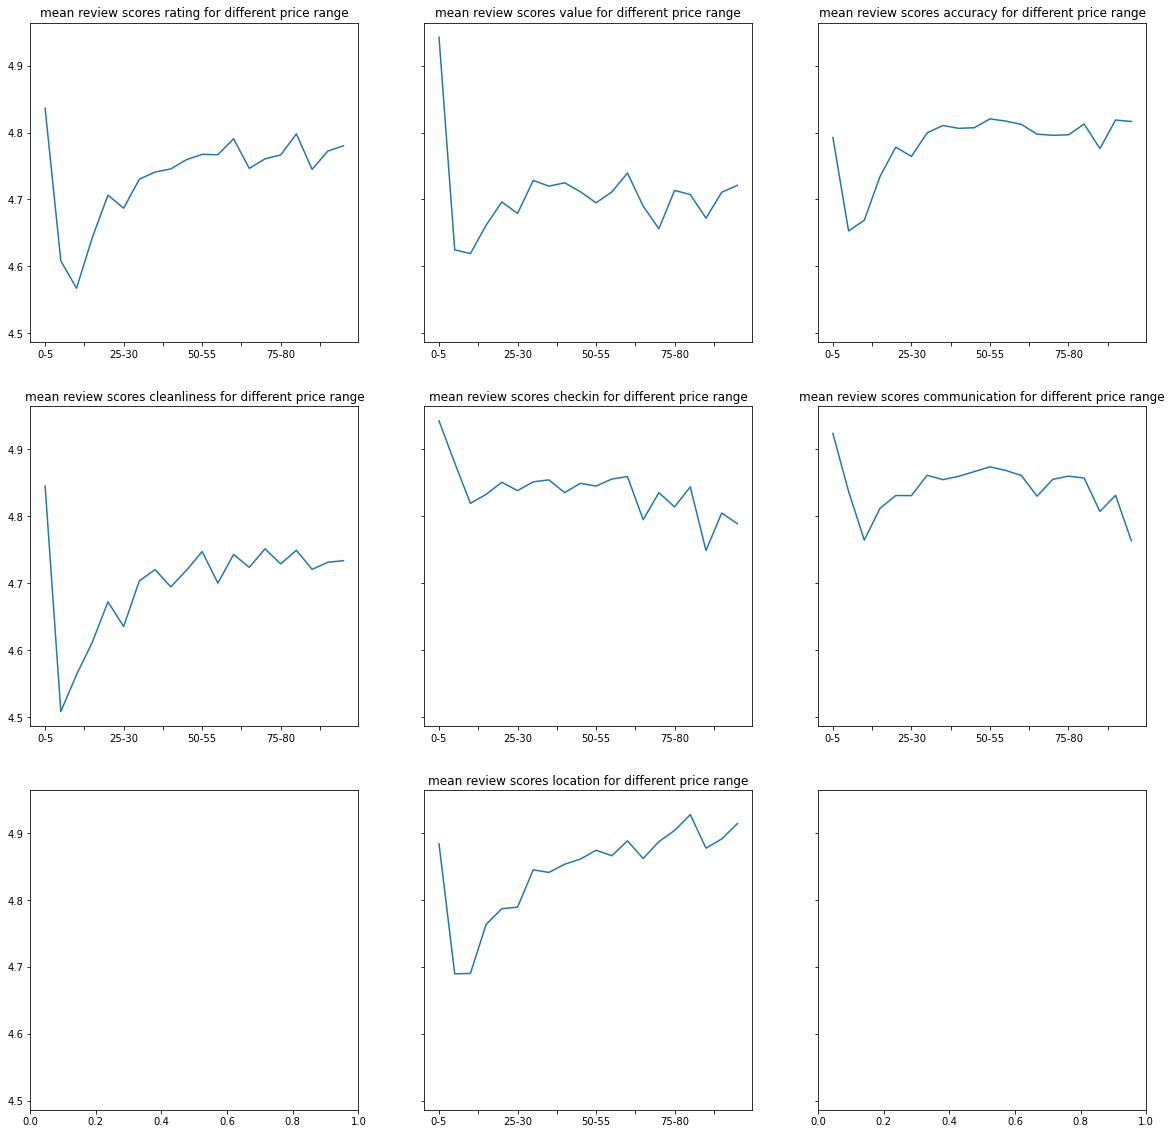

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharey=True)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
mrsra["mean_review_scores_rating"].plot(ax=axes[0, 0]);
axes[0, 0].set_title("mean review scores rating for different price range");
mrsra["mean_review_scores_value"].plot(ax=axes[0, 1]);
axes[0, 1].set_title("mean review scores value for different price range");
mrsra["mean_review_scores_accuracy"].plot(ax=axes[0, 2]);
axes[0, 2].set_title("mean review scores accuracy for different price range");
mrsra["mean_review_scores_cleanliness"].plot(ax=axes[1, 0]);
axes[1, 0].set_title("mean review scores cleanliness for different price range");
mrsra["mean_review_scores_checkin"].plot(ax=axes[1, 1]);
axes[1, 1].set_title("mean review scores checkin for different price range");
mrsra["mean_review_scores_communication"].plot(ax=axes[1, 2]);
axes[1, 2].set_title("mean review scores communication for different price range");
mrsra["mean_review_scores_location"].plot(ax=axes[2, 1]);
axes[2, 1].set_title("mean review scores location for different price range");

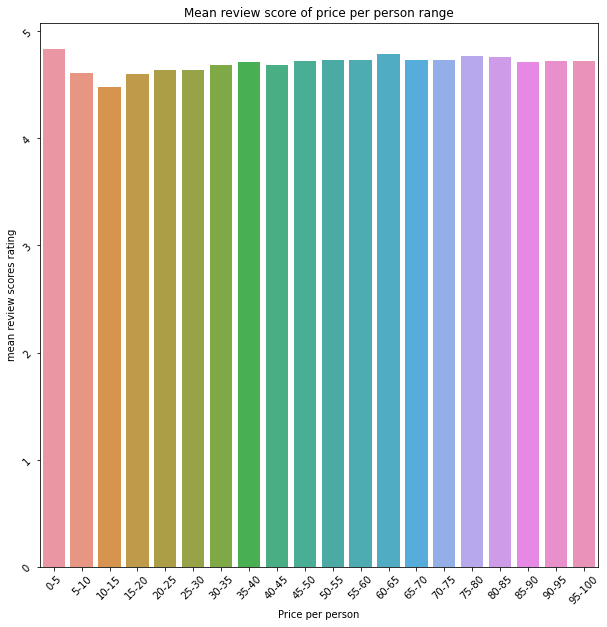

In [68]:
plt.figure(figsize = (10,10))
sns.barplot(x=mrsrf.index.values, y='mean_review_scores_rating', data=mrsrf).set(xlabel="Price per person", ylabel = "mean review scores rating", title = 'Mean review score of price per person range')
#plt.xticks(rotation=90)
plt.tick_params(labelrotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

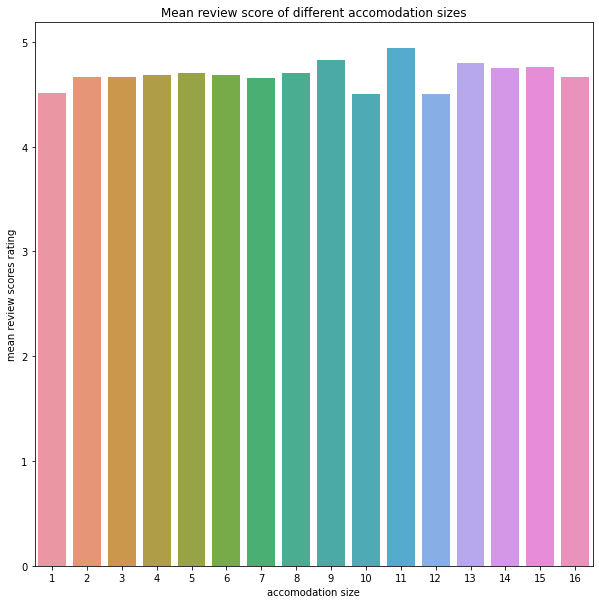

In [74]:
plt.figure(figsize = (10,10))
sns.barplot(x=ars.index.values, y='mean_review_scores_rating', data=ars).set(xlabel="accomodation size", ylabel = "mean review scores rating", title = 'Mean review score of different accomodation sizes')
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

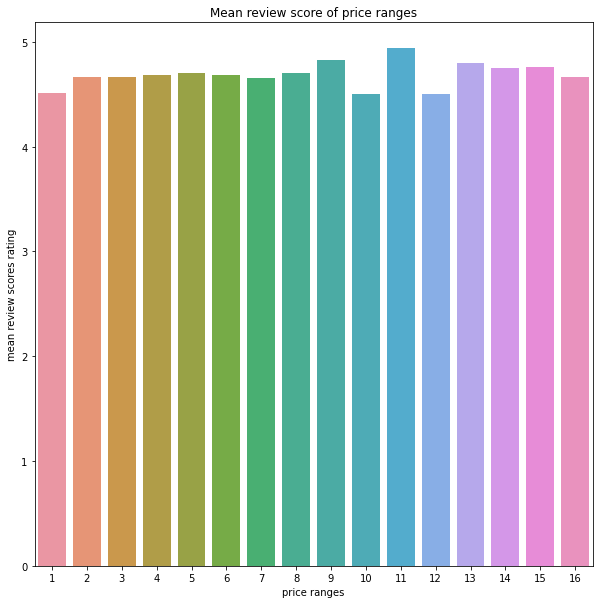

In [73]:
plt.figure(figsize = (10,10))
sns.barplot(x=ars.index.values, y='mean_review_scores_rating', data=ars).set(xlabel="price ranges", ylabel = "mean review scores rating", title = 'Mean review score of price ranges')
plt.xticks(rotation=0)

In [ ]:
#Analysis of data and graphs

In [ ]:
#After processing the data and focusing on the research, we are able to see a better correlation between the variables.